395
563.8104864665629


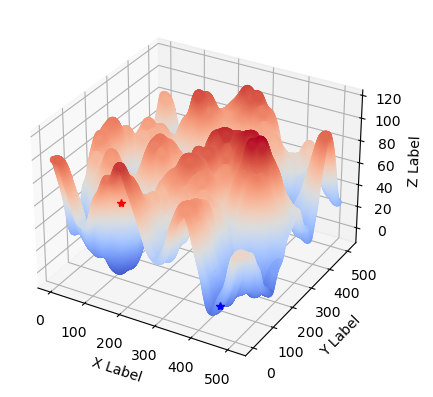

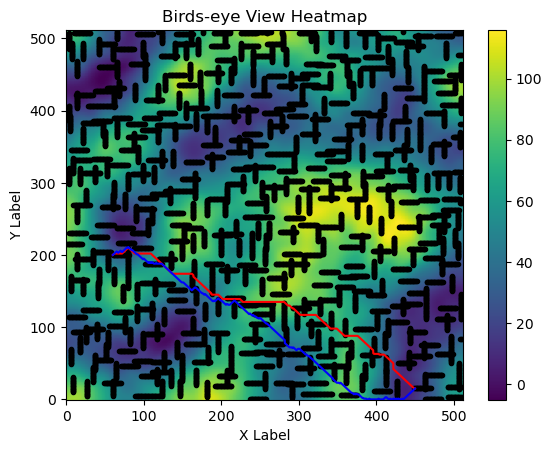

In [5]:
import math

import matplotlib.pyplot as plt
import numpy as np


class Node:
    def __init__(self, pos=None, parent=None):
        self.pos = pos
        self.parent = parent
        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.pos == other.pos

    def __lt__(self, other):
        return self.f < other.f


def get_cost(array, start_node, end_node, mode):
    if mode == "length":
        return math.sqrt(
            (start_node.pos[0] - end_node.pos[0]) ** 2
            + (start_node.pos[1] - end_node.pos[1]) ** 2
            + (
                array[start_node.pos[0]][start_node.pos[1]][0]
                - array[end_node.pos[0]][end_node.pos[1]][0]
            )
            ** 2
        )
    elif mode == "steps":
        return 1


def get_heuristic(array, start_node, end_node, mode):
    if mode == "length":
        return math.sqrt(
            (start_node.pos[0] - end_node.pos[0]) ** 2
            + (start_node.pos[1] - end_node.pos[1]) ** 2
            + (
                array[start_node.pos[0]][start_node.pos[1]][0]
                - array[end_node.pos[0]][end_node.pos[1]][0]
            )
            ** 2
        )
    elif mode == "steps":
        return max(
            abs(start_node.pos[0] - end_node.pos[0]),
            abs(start_node.pos[1] - end_node.pos[1]),
        )


# def min(list):
#     min = list[0]
#     for i in list:
#         if i.f < min.f:
#             min = i
#     return min


import heapq


def csillagszemujuhasz(terrain, start, end, mode):
    closed_set = set()

    start_node = Node(start, None)
    start_node.g = start_node.h = start_node.f = 0

    end_node = Node(end, None)
    end_node.g = end_node.h = end_node.f = 0

    open_set = [(start_node.f, start_node)]
    while open_set:
        current = heapq.heappop(open_set)[1]

        if current == end_node:
            print(current.g)
            return reconstruct(current)

        closed_set.add(current.pos)

        (x, y) = current.pos  # type: ignore
        neighbors = [
            (x - 1, y - 1),
            (x - 1, y),
            (x - 1, y + 1),
            (x, y - 1),
            (x, y + 1),
            (x + 1, y - 1),
            (x + 1, y),
            (x + 1, y + 1),
        ]

        for i in neighbors:
            if (
                (i[0] > (len(terrain) - 1))
                or (i[0] < 0)
                or (i[1] > (len(terrain[len(terrain) - 1]) - 1))
                or (i[1] < 0)
            ):
                continue
            if terrain[i[0]][i[1]][1] == 1:
                continue

            new_node = Node(i, current)

            if new_node.pos in closed_set:
                continue

            new_g = current.g + get_cost(terrain, current, new_node, mode)  # type: ignore
            new_h = get_heuristic(terrain, new_node, end_node, mode)  # type: ignore
            new_f = new_g + new_h  # type: ignore

            tmp = False
            for j in open_set:
                if new_node == j[1] and new_f >= j[0]:
                    tmp = True
                    break
            if tmp:
                continue

            new_node.g = new_g
            new_node.h = new_h  # type: ignore
            new_node.f = new_f

            heapq.heappush(open_set, (new_f, new_node))

    return None


def reconstruct(current):
    path = []
    tmp = current

    while tmp is not None:
        path.append(tmp.pos)
        tmp = tmp.parent

    return path[::-1], float(current.g)


fig1 = plt.figure(1)
ax1 = fig1.add_subplot(111, projection="3d")

fig2 = plt.figure(2)
ax2 = fig2.add_subplot(111)


def read_surface_data(surface_file):
    # Load surface data
    data = np.loadtxt(surface_file)
    x = data[:, 0]
    y = data[:, 1]
    z = data[:, 2]
    b = data[:, 3]

    # Create 3D plot

    ax1.scatter(x[b == 0], y[b == 0], z[b == 0], c=z[b == 0], cmap="coolwarm")
    ax1.plot(x[b == 1], y[b == 1], z[b == 1], "k.")
    ax2.plot(x[b == 1], y[b == 1], "k.")

    ax1.set_xlabel("X Label")
    ax1.set_ylabel("Y Label")
    ax1.set_zlabel("Z Label")
    plt.title("3D Plot")

    # Create heatmap

    size = int(math.sqrt(data.shape[0]))

    heatmap = ax2.pcolormesh(
        x.reshape(size, size),
        y.reshape(size, size),
        z.reshape(size, size),
        cmap="viridis",
        shading="auto",
    )
    plt.colorbar(heatmap, ax=ax2, shrink=1)
    ax2.set_xlabel("X Label")
    ax2.set_ylabel("Y Label")
    plt.title("Birds-eye View Heatmap")

    terrain = [[0.0 for _ in range(size)] for _ in range(size)]

    for i in range(data.shape[0]):
        terrain[int(x[i])][int(y[i])] = (float(z[i]), bool(b[i]))  # type: ignore

    return size, terrain


def read_end_points(end_points_file):
    with open(end_points_file, "r") as f:
        start_x, start_y = map(int, next(f).split())
        end_x, end_y = map(int, next(f).split())
        # if array[start_x][start_y][1] == 1:
        #     print('Start point is not valid')
        #     exit(1)
        # if array[end_x][end_y][1] == 1:
        #     print('End point is not valid')
        #     exit(1)
        # print(start_x, start_y)
        # print(end_x, end_y)

    return (start_x, start_y), (end_x, end_y)


def write_output_file(output_file, path_a, minlength, path_b, minsteps, array):
    path_a_x = [x for x, y in path_a]
    path_a_y = [y for x, y in path_a]
    path_a_z = [array[x][y][0] + 1 for x, y in path_a]
    path_b_x = [x for x, y in path_b]
    path_b_y = [y for x, y in path_b]
    path_b_z = [array[x][y][0] + 1 for x, y in path_b]

    ax1.plot(path_a_x, path_a_y, path_a_z, "r")
    ax1.plot(path_b_x, path_b_y, path_b_z, "b")
    ax2.plot(path_a_x, path_a_y, "r")
    ax2.plot(path_b_x, path_b_y, "b")

    output = f"1. feladat:\nUt: {path_a}\nKoltseg: {minlength}\n\n2. feladat:\nUt: {path_b}\nLepesszam: {minsteps}"
    with open(output_file, "w") as f:
        f.write(output)

    return None


def main(
    surface_file="surface_512x512.txt", end_points_file="surface_512x512.end_points.txt"
):
    size, terrain = read_surface_data(surface_file)
    start, end = read_end_points(end_points_file)

    ax1.plot(start[0], start[1], terrain[start[0]][start[1]][0], "r*", zorder=10)  # type: ignore
    ax1.plot(end[0], end[1], terrain[end[0]][end[1]][0], "b*", zorder=10)  # type: ignore

    path_b, minsteps = csillagszemujuhasz(terrain, start, end, mode="steps")  # type: ignore
    path_a, minlength = csillagszemujuhasz(terrain, start, end, mode="length")  # type: ignore

    output_file = f"Lab1_out.txt"
    write_output_file(output_file, path_a, minlength, path_b, minsteps, terrain)

    ax1.grid(True)

    plt.show()


if __name__ == "__main__":
    main()

In [6]:
512*512

262144